<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Downloading and Annotating Genomic Sequences</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM/CBE 480A5, Spring 2025
Instructor: Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



# Learning Objectives
In this lesson, we are going to use some common sequence manipulation and search tools to learn about the DNA, RNA and proteins related to the Corona Virus. After completing this lesson, you will be able to:

* Describe the meaning and use of ```accession numbers``` to identify biological data sets.
* Describe and use Python tools to acquire genomic data from online ```repositories```
* Find and describe basic information that is commonly used to ```annotate``` genetic sequences
* Find and analyze ```open reading frames``` in DNA and RNA sequences
* ```Translate``` between DNA, cDNA, RNA and protein sequences
* Find and use different software packages to ```analyze``` biological sequence data
* Access online electronic information and primary literature to gain more information about specific biological sequences and data


# 1) Downloading genomic data from an online database

Before we can analyze any given sequence data set, the first step is always going to be to obtain the data!

In this notebook, we are goin to focus in on a specific example, namely, the corona virus.

Our first step is to download the corona virus sequence (and a large amount of information about that sequence) from the ```genbank``` data base.  

I did a quick internet seach and found that an accession number from Severe acute respiratory syndrome coronavirus 2 isolate  Wuhan-Hu-1, complete genome: ```MN908947```.

We are going to use the modules ```Bio``` and ```biopython```, so let's import those now. 

**Note** - If any of the following packages do not import, you may need to install the missing modules using magic commands (see code below).

In [1]:
# Note, if you have not already installed the following packages, you can do so
#  by running the following magic commands:
# %pip install biopython
# %pip install Bio

# Importing the necessary libraries
import Bio
from Bio import Entrez, SeqIO, pairwise2, AlignIO, Phylo
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import ProtParam
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import webbrowser
import os
import threading

/Users/munsky/anaconda3/envs/BIOM480A5/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
#(PRELIMINARIES) Let's download the COVID19 virus sequence from NCBI
# Provide your email for accessing NCBI
Entrez.email = "brian.munsky@colostate.edu"  # Insert your email here

def get_genbank(accession_number):
    handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    return record

corona_virus = get_genbank("MN908947")

### 1.A) Exploring features of genomic data

Now that we have the data, let's explore to see what information is available to us:

In [3]:
# Let's look at what kinds of information are available to use in the data set:
print(corona_virus)

ID: MN908947.3
Name: MN908947
Description: Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 23
/molecule_type=ss-RNA
/topology=linear
/data_file_division=VRL
/date=18-MAR-2020
/accessions=['MN908947']
/sequence_version=3
/keywords=['']
/source=Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
/organism=Severe acute respiratory syndrome coronavirus 2
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Pisuviricota', 'Pisoniviricetes', 'Nidovirales', 'Cornidovirineae', 'Coronaviridae', 'Orthocoronavirinae', 'Betacoronavirus', 'Sarbecovirus', 'Severe acute respiratory syndrome-related coronavirus']
/references=[Reference(title='A new coronavirus associated with human respiratory disease in China', ...), Reference(title='Direct Submission', ...)]
/comment=On Jan 17, 2020 this sequence version replaced MN908947.2.
/structured_comment=defaultdict(<class 'dict'>, {'Assembly-Data': {'Assembly Method': 'Megahit v. V1.1.3', 'Sequ

In [4]:
# Print the first 1000 nucleotides.
print(corona_virus.seq[0:1000])         # Output the sequence to screen.

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [5]:
# Find the length of the sequence
len(corona_virus.seq)  # Find the length of the sequence.

29903

In [6]:
# Explore what annotations are made about the sequence
corona_virus.annotations

{'molecule_type': 'ss-RNA',
 'topology': 'linear',
 'data_file_division': 'VRL',
 'date': '18-MAR-2020',
 'accessions': ['MN908947'],
 'sequence_version': 3,
 'keywords': [''],
 'source': 'Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)',
 'organism': 'Severe acute respiratory syndrome coronavirus 2',
 'taxonomy': ['Viruses',
  'Riboviria',
  'Orthornavirae',
  'Pisuviricota',
  'Pisoniviricetes',
  'Nidovirales',
  'Cornidovirineae',
  'Coronaviridae',
  'Orthocoronavirinae',
  'Betacoronavirus',
  'Sarbecovirus',
  'Severe acute respiratory syndrome-related coronavirus'],
 'references': [Reference(title='A new coronavirus associated with human respiratory disease in China', ...),
  Reference(title='Direct Submission', ...)],
 'comment': 'On Jan 17, 2020 this sequence version replaced MN908947.2.',
 'structured_comment': defaultdict(dict,
             {'Assembly-Data': {'Assembly Method': 'Megahit v. V1.1.3',
               'Sequencing Technology': 'Illumina'}})}

In [7]:
# What is the taxonomy of the sequence?
corona_virus.annotations['taxonomy']

['Viruses',
 'Riboviria',
 'Orthornavirae',
 'Pisuviricota',
 'Pisoniviricetes',
 'Nidovirales',
 'Cornidovirineae',
 'Coronaviridae',
 'Orthocoronavirinae',
 'Betacoronavirus',
 'Sarbecovirus',
 'Severe acute respiratory syndrome-related coronavirus']

In [8]:
# What is the accession number?
corona_virus.annotations['accessions']

['MN908947']

In [9]:
# Let's get more information by going directly to the sequence entry on NCBI.
sequence_link = 'https://www.ncbi.nlm.nih.gov/nuccore/' + corona_virus.annotations['accessions'][0]
webbrowser.open_new(sequence_link)

True

In [10]:
# We can get even more information about the sequence by looking 
# at the original paper that described this sequence.  For this, 
# we will first need the PUBMED ID number:
print(corona_virus.annotations['references'][0].pubmed_id)

# With that we can launch a browser and find the article:
pubmed_link = 'https://www.ncbi.nlm.nih.gov/pubmed/' + corona_virus.annotations['references'][0].pubmed_id
webbrowser.open_new(pubmed_link)

32015508


True

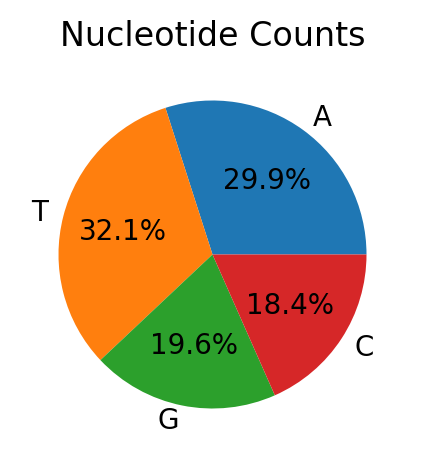

In [11]:
# Let's make a pie chart of the number of each nucleotide:

seq = str(corona_virus.seq)
neucleotides = 'ATGC'
counts = []
for i in range(4):
    counts.append(seq.count(neucleotides[i]))

plt.figure(figsize=(2.5, 2.5), dpi=200)
plt.pie(counts, labels=neucleotides, autopct='%1.1f%%')
plt.title('Nucleotide Counts')
plt.show()

the sum of the dimers is = 29902
the length - 1 of the sequence is = 29902


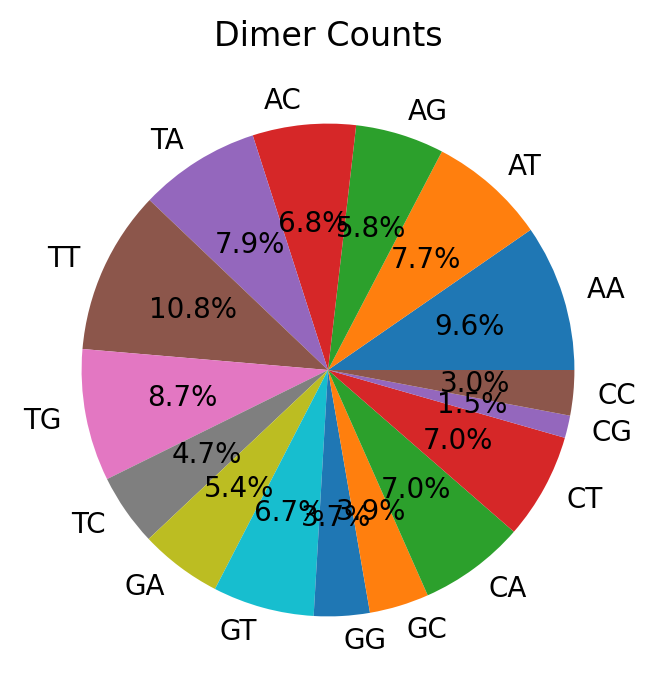

In [12]:
# Let's do the same thing, but for dimers:
neucleotides = 'ATGC'
labels = []
dimerDict = {}
for i in range(4):
    for j in range(4):
        labels.append(neucleotides[i]+neucleotides[j])
        dimerDict[neucleotides[i]+neucleotides[j]] = 0
for i in range(len(corona_virus.seq)-1):
    dimerDict[corona_virus.seq[i:i+2]] += 1

# Check that the sum is correct
print(f'the sum of the dimers is = {sum([dimerDict[i] for i in dimerDict])}')
print(f'the length - 1 of the sequence is = {len(corona_virus.seq)-1}')  

plt.figure(figsize=(4, 4), dpi=200)
plt.pie([dimerDict[i] for i in dimerDict], labels=[i for i in dimerDict], autopct='%1.1f%%')
plt.title('Dimer Counts')
plt.show()

### 1.B) Visualizing translation open reading frames
In the next cell, we examine a sequence to find what its sequence would translate to in amino acids, and then we plot all of the open reading frames (ORFs) in each frame.

In [13]:
# Print the AA sequence that would be coded for each frame:
frame = 0
AA_frame = corona_virus[frame:].translate(to_stop=False)
print(AA_frame.seq[1:1000])

KGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VEYGYILLI**VW


/Users/munsky/anaconda3/envs/BIOM480A5/lib/python3.10/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


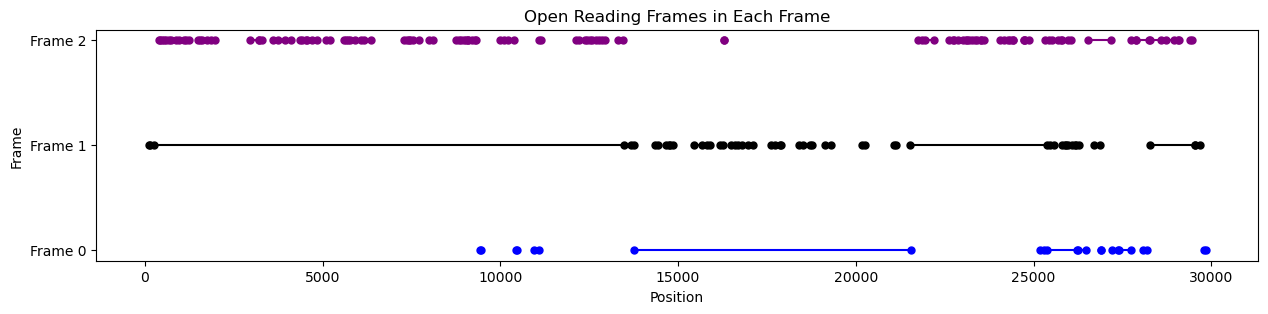

In [14]:
# Now, let's make a plot of the open reading frames to show where they are on the sequence.

# Function to find ORFs in all frames of a sequence
def find_all_orfs(sequence):
    orf_list = []           # List of all the ORF we find
    for frame in range(3):  # Check each of the three reading frames
        orfs = []           # List of ORFs for the current frame   
        lastStop = frame    # Position of last stop codon.
        for orf in sequence[frame:].translate(to_stop=False).split('*'):     # Translate the curent frame sequence into AA and break up by stop codons
            if len(orf) > 30:                                                # Consider ORFs longer than 50 amino acids
                start = lastStop + orf.find('M') * 3 if 'M' in orf else None # Update start codon position to next M, 
                stop = lastStop + (len(orf))*3 if 'M' in orf else None       # Update stop codon to next '*'
                if start is not None and stop is not None:                   # In the coding region is >30AA
                    orfs.append((start, stop))                                      # Append the start and stop positions for that ORF
            lastStop += len(orf)*3 + 3           # Update the position of the last stop codon
        orf_list.append(orfs)                    # Append the list of ORFs for the current frame
    return orf_list

# Find all ORFs in each frame of the sequence
orf_positions = find_all_orfs(corona_virus.seq)

# Visualize ORFs on the sequence for each frame
plt.figure(figsize=(15, 3))
colors = ['blue','black','purple']
for frame, orfs in enumerate(orf_positions):
    for start, stop in orfs:
        plt.plot([start, stop], [frame, frame], marker='o', color=colors[frame], markersize=5)
plt.title('Open Reading Frames in Each Frame')
plt.xlabel('Position')
plt.ylabel('Frame')
plt.yticks([0, 1, 2], ['Frame 0', 'Frame 1', 'Frame 2'])
plt.show()

### 1.B) Exploring advanced features in the genome

Here is an example for how to download the genbank file to disk so that you can analyse it later.

In [15]:
def download_genbank(accession_number, output_file):
    try:
        # Fetch the GenBank record
        handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")

        # Write the record to a file
        with open(output_file, "w") as f:
            f.write(handle.read())

        print(f"GenBank record downloaded and saved to {output_file}")

    except Exception as e:
        print(f"Error: {e}")

# Example: Download GenBank record for a given accession number
accession_number = "MN908947"  # Replace with your accession number
output_file = "coronaVirus.gb"

download_genbank(accession_number, output_file)

GenBank record downloaded and saved to coronaVirus.gb


In [16]:
# Now that the file is saved, you can re-open it to get the information.
def extract_features(genbank_file):
    for record in SeqIO.parse(genbank_file, 'genbank'):
        for feature in record.features:
            print(f"Feature Type: {feature.type}")
            print(f"Location: {feature.location}")
            print(f"Qualifiers: {feature.qualifiers}")

extract_features(output_file)

Feature Type: source
Location: [0:29903](+)
Qualifiers: {'organism': ['Severe acute respiratory syndrome coronavirus 2'], 'mol_type': ['genomic RNA'], 'isolate': ['Wuhan-Hu-1'], 'host': ['Homo sapiens'], 'db_xref': ['taxon:2697049'], 'geo_loc_name': ['China'], 'collection_date': ['Dec-2019']}
Feature Type: 5'UTR
Location: [0:265](+)
Qualifiers: {}
Feature Type: gene
Location: [265:21555](+)
Qualifiers: {'gene': ['orf1ab']}
Feature Type: CDS
Location: join{[265:13468](+), [13467:21555](+)}
Qualifiers: {'gene': ['orf1ab'], 'ribosomal_slippage': [''], 'note': ['pp1ab; translated by -1 ribosomal frameshift'], 'codon_start': ['1'], 'product': ['orf1ab polyprotein'], 'protein_id': ['QHD43415.1'], 'translation': ['MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKT

In [17]:
# Calculate amino acid count and plot as a bar chart
aa_counts = ProtParam.ProteinAnalysis(proteinOfInterest).count_amino_acids()
plt.bar(aa_counts.keys(), aa_counts.values())
plt.xlabel('Amino Acids')
plt.ylabel('Count')
plt.title('Amino Acid Content')
plt.show()

# Calculate atomic composition of the protein
atomic_composition = ProtParam.ProteinAnalysis(proteinOfInterest).get_amino_acids_percent()

# Calculate molecular weight of the protein
molecular_weight = ProtParam.ProteinAnalysis(proteinOfInterest).molecular_weight()

print(f"The Molecular weight of this protein is {molecular_weight} Daltons.")

NameError: name 'proteinOfInterest' is not defined